# More about Pandas -Parrt 4
In our previous days we covered different pandas library function .Now will we will learn some more concept in better and clear way . 
* Performing previous steps
* Handling Null Values
* Binning 
* Filterig the Data

## performing previous steps

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib as plt


In [5]:
# loading the dataset from library
df=sns.load_dataset('titanic')

In [6]:
# displaying the dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
# getting info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


-----

## Handling Null Values
first step is to check the null values
1. Droping the coloumns ( if missing values/Null values  are very large in number like more than 60-70 %)
2. Impute the values with mean or median (normally for numerical values like age)
3. Impute the values with mode ( normally for categorical values)

In [ ]:
# to count total number of nulln values across coloumns
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
# calculating percentage of null values
(df.isnull().sum()/df.shape[0])*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

### Dropping the coloumn  

In [11]:
# dropping null values as they are greater than 70 % 
df.drop('deck',axis=1,inplace=True)

In [12]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

### Imputing the values through median 


In [13]:
# through median 
df['age'].fillna(df['age'].median(),inplace=True)


C:\Users\bashi\AppData\Local\Temp\ipykernel_4668\3329224850.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)


In [14]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

### Imputing through Mode


In [15]:
# imputing with mode
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)

C:\Users\bashi\AppData\Local\Temp\ipykernel_4668\293728754.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)


In [16]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


-------

## Binning 
Binning is a data preprocessing technique used to **group numerical data into discrete intervals or bins**. In Pandas, you can use the cut() or qcut() function to bin data.
**Benefits of Binning**
1. **Simplifies complex data**: Binning helps to reduce the complexity of numerical data by grouping it into manageable categories.
2. **Improves model performance**: Binning can improve the performance of machine learning models by reducing the impact of outliers and noise.
3. **Enhances data interpretation**: Binning makes it easier to understand and interpret the data by providing a clear and concise representation of the distribution. <br>
**Common Use Cases**
1. **Age grouping**: Binning age into categories like 'Young', 'Adult', and 'Senior' can be useful in demographic analysis.
2. **Income categorization**: Binning income into categories like 'Low', 'Medium', and 'High' can be useful in financial analysis.
3. **Score categorization**: Binning scores into categories like 'Pass' and 'Fail' can be useful in educational analysis.

array([[<Axes: title={'center': 'age'}>]], dtype=object)

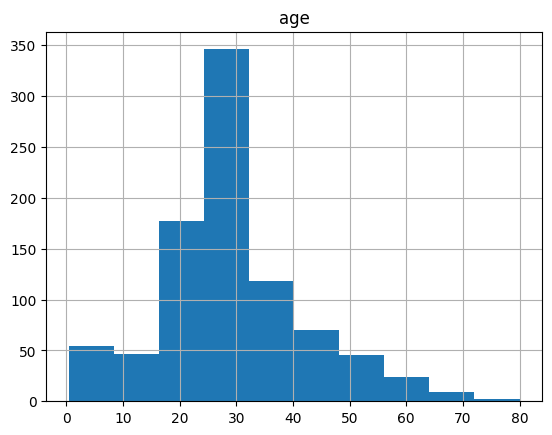

In [17]:
# for binning let's understand the data first 
df.hist(column='age')

In [22]:
# steps for binning 
# 1.creating bins (like ranges we want for example age 1-10)
bins=[0,1,5,12,18,30,50,80]

#2 create labels
labels=['baby','toodlers','child','teenager','young adult','adult','senior citizen']


#3. using the formula
df['binned_age']=pd.cut(df['age'],bins=bins, labels=labels)

In [23]:
df['binned_age'].value_counts()

binned_age
young adult       447
adult             241
teenager           70
senior citizen     64
toodlers           30
child              25
baby               14
Name: count, dtype: int64

In [24]:
# We can also rename the coloumn
df.rename(columns={'binned_age':'age_group'},inplace=True)

In [25]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,young adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,young adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,adult


## Filtering Data
is a crucial step in data analysis that involves selecting a subset of data based on specific conditions. In Pandas, you can use various methods to filter data.<br>
**Benefits of Filtering**
1. **Reduces data size**: Filtering data reduces the size of the dataset, making it easier to work with.
2. **Improves analysis**: Filtering data helps to focus on specific subsets of data, improving the accuracy of analysis.
3. **Enhances visualization**: Filtering data helps to create more meaningful visualizations by removing irrelevant data.

### basic Filtering 
* use conditional statements to filter data.


In [31]:
#viewing rows only age is greater than 30 
age_above_30=df[df['age'] > 30]
age_above_30

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,adult
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True,senior citizen
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,Southampton,yes,True,senior citizen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,0,3,male,47.0,0,0,9.0000,S,Third,man,True,Southampton,no,True,adult
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,Cherbourg,yes,False,senior citizen
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,Southampton,no,True,adult
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False,adult


### combining multipe conditions
* can use logical operators (&, |, ~) to combine multiple conditions.

In [32]:
# where age is 30 and gender is female
filtered_df=df[(df['age'] > 30) & (df['sex'] == 'female')]
filtered_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,adult
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,Southampton,yes,True,senior citizen
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,Southampton,yes,True,senior citizen
18,0,3,female,31.0,1,0,18.0000,S,Third,woman,False,Southampton,no,False,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,Southampton,yes,True,adult
865,1,2,female,42.0,0,0,13.0000,S,Second,woman,False,Southampton,yes,True,adult
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,Southampton,yes,False,adult
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,Cherbourg,yes,False,senior citizen


### selecting specific coloumns


In [35]:
filtered_data=df[['age','class','alive']]
filtered_data

,age,class,alive
0,22.0,Third,no
1,38.0,First,yes
2,26.0,Third,yes
3,35.0,First,yes
4,35.0,Third,no
...,...,...,...
886,27.0,Second,no
887,19.0,First,yes
888,28.0,Third,no
889,26.0,First,yes
